# HW 3: Supervised Learning on the Bank Marketing Dataset

The original dataset is available here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
We have a modified subset of this dataset to practice data  preprocessing. 

Perform the following tasks on the provided bank marketing dataset (bank-hw1.csv contains the dataset and bank-names.txt contains the description of the original dataset). Complete all the LP questions to receive a "low pass" grade on the homework. Complete all the LP questions and at least one of the HP questions to receive a "high pass" grade on the homework. 

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

[LP 1] Import/modify your preprocessed dataset from HW1 or clean the dataset here. Extract the following columns:

1. duration: all entries must be non-negative
2. campaign
3. pdays
4. previous
5. y

The "y" column is the label. 

The set of values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices if you are preprocessing the dataset again here and comment on the changes you make to the preprocessed dataset from HW1. 

Prepare the data by splitting into training and test datasets to perform supervised learning on this filtered dataset. 

In [61]:
# Your code for LP1 goes here
# Feel free to add cells below this for LP1

import pandas as pd
df=pd.read_csv('bank_cleans.csv')

#Extract columns

df1 = df[['duration','campaign','pdays','previous']]
df2 = df[['y']]

# Encoded data in cloumn y into numerical values

from sklearn.preprocessing import LabelBinarizer
encoder1 = LabelBinarizer()
encoded_y = encoder1.fit_transform(df2['y'].values.reshape(-1,1))
df2['y']=encoded_y


C:\Users\Checkout\AppData\Local\Temp/ipykernel_22360/1325952187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y']=encoded_y


In [62]:
#Split into training and test data

training_data1 = df1.sample(frac=0.8, random_state=25)
testing_data1 = df1.drop(training_data1.index)

training_data2 = df2.sample(frac=0.8, random_state=25)
testing_data2 = df2.drop(training_data2.index)

# print(f"No. of training examples: {training_data.shape[0]}")
# print(f"No. of testing examples: {testing_data.shape[0]}")


[LP 2] Build a decision tree on the training dataset upto a maximum depth of 6 with the entropy as the criterion and plot the decision tree. 

[Text(183.16956521739132, 201.90857142857143, 'X[0] <= 0.458\nentropy = 0.514\nsamples = 2242\nvalue = [1985, 257]'),
 Text(90.37173913043479, 170.84571428571428, 'X[2] <= -0.408\nentropy = 0.323\nsamples = 1835\nvalue = [1727, 108]'),
 Text(33.96521739130435, 139.78285714285715, 'X[0] <= -0.544\nentropy = 0.225\nsamples = 1489\nvalue = [1435, 54]'),
 Text(9.704347826086957, 108.72, 'X[0] <= -0.618\nentropy = 0.019\nsamples = 557\nvalue = [556, 1]'),
 Text(4.852173913043479, 77.65714285714284, 'entropy = 0.0\nsamples = 420\nvalue = [420, 0]'),
 Text(14.556521739130435, 77.65714285714284, 'X[0] <= -0.614\nentropy = 0.062\nsamples = 137\nvalue = [136, 1]'),
 Text(9.704347826086957, 46.59428571428572, 'X[1] <= -0.424\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(4.852173913043479, 15.531428571428563, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(14.556521739130435, 15.531428571428563, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(19.408695652173915, 46.594285714285

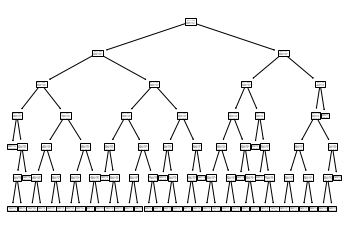

In [63]:
# Your code for LP2 goes here
# Feel free to add cells below this for LP2


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
decision_tree = decision_tree.fit(df1,df2)

#This code plots decision tree 
tree.plot_tree(decision_tree)


[HP 1] Are there any leaf nodes with an entropy > 0? If so, what does it mean? How does this model perform on the test dataset? Provide an example on how the results for a single sample can be interpreted.

In [64]:
# Your code for HP1 goes here
# Feel free to add cells below this for HP1

#Nodes with entrpy using impurity

n1=decision_tree.tree_.node_count
n2=len(list(filter(lambda y: y > 0, decision_tree.tree_.impurity)))
print(f'Total nodes in Decision Tree is {n1}')
print(f'Nodes with entropy > 0 is {n2}')





Total nodes in Decision Tree is 87
Nodes with entropy > 0 is 63


In [65]:
#Accuracy of the model
from sklearn.metrics import accuracy_score
X = decision_tree.predict(testing_data1)
acc=accuracy_score(testing_data2, X)*100
print(f'Accuracy of Test Data is {acc}')

Accuracy of Test Data is 91.96428571428571


< Your answer for HP1 goes here >

[LP 3] Perform grid search with cross-validation to determine the best decision tree for the dataset and decide between the following hyperparamters:
  min_samples_split = [4, 10, 20]
  max_depth = [3, 4, 5]
Plot the best performing model.

In [66]:
# Your code for LP3 goes here
# Feel free to add cells below this for LP3

from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_split': [4, 10, 20],
    'max_depth': [3, 4, 5]   
}

In [67]:
gscv = GridSearchCV(DecisionTreeClassifier(random_state=25), params, verbose=1, cv=5)
gscv.fit(training_data1, training_data2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [4, 10, 20]},
             verbose=1)

In [68]:
gscv_accuracy = list(map(lambda x: x*100, gscv.cv_results_['mean_test_score']))
gscv_depth = list(map(lambda x: x['max_depth'], gscv.cv_results_['params']))
gscv_samples_split = list(map(lambda x: x['min_samples_split'], gscv.cv_results_['params']))

gscv_data = {'max_depth': gscv_depth, 'min_samples_split': gscv_samples_split, 'accuracy': gscv_accuracy}
gscv_results = pd.DataFrame(data=gscv_data)
gscv_results


,max_depth,min_samples_split,accuracy
0,3,4,88.182724
1,3,10,88.182724
2,3,20,88.182724
3,4,4,87.736730
4,4,10,87.736730
5,4,20,87.792440
6,5,4,87.458178
7,5,10,87.290892
8,5,20,87.235182


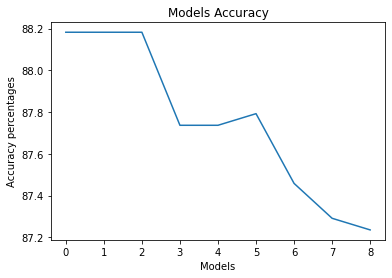

In [69]:
#Accuracies of models. Best model gives best accuracy
import matplotlib.pyplot as plt
plt.plot(range(0, gscv_results.shape[0]), list(gscv_results['accuracy']))
plt.title('Models Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy percentages')
plt.show()

[LP 4] Train a neural network (multi-layer perceprtron) using the training dataset with two hidden layers containing 64 neurons each.

Pick the following parameters: max_iter=100,solver='adam',early_stopping=True,random_state=10

In [70]:
# Your code for LP4 goes here
# Feel free to add cells below this for LP4

from sklearn.neural_network import MLPClassifier
mlpclf = MLPClassifier(hidden_layer_sizes=(64, 64), random_state=25, 
                        max_iter=100, solver='adam', early_stopping=True)
mlpclf.fit(training_data1, training_data2)


C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 64), max_iter=100,
              random_state=25)

In [71]:
from sklearn.metrics import accuracy_score
mlppredict = mlpclf.predict(testing_data1)
acc1=accuracy_score(testing_data2, mlppredict)*100
print(f'Accuracy on Test Data is {acc1}')

Accuracy on Test Data is 89.0625


[HP 2] Interpret the results of grid search CV for the decision tree and neural network and comment on the following:
1. How does the model perform on the test dataset? 
2. Based on the confusion matrix for the best performing model, do you think the model performs satisfactorily for the application?


In [72]:
# Your code for HP2 goes here
# Feel free to add cells below this for HP2

from sklearn.metrics import confusion_matrix

#Model performance on test dataset(testing_data1)
maximum_depth = gscv.best_params_['max_depth']
minimum_samples_split = gscv.best_params_['min_samples_split']

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=maximum_depth, min_samples_split=minimum_samples_split)
decision_tree.fit(training_data1, training_data2)

pred = decision_tree.predict(testing_data1)
acc2=accuracy_score(testing_data2, pred)*100
print(f'Accuracy on Test Data is {acc2}')

Accuracy on Test Data is 89.50892857142857


In [ ]:
#HP2 1. Both NN (Multilayer Perception) and grid search CV for the best performing 
#decision tree model give almost similar accuraciesaround 89% +. 
#The best performingdecision tree model gives a little higher percentage with 89.5%

In [73]:
#confusion matrix for best performing decision tree model
confusion_matrix(testing_data2, pred)


array([[385,  15],
       [ 32,  16]], dtype=int64)

In [74]:
#confusion matrix for Multilayer perception
confusion_matrix(testing_data2, mlppredict)

array([[394,   6],
       [ 43,   5]], dtype=int64)

In [ ]:
#In the matrix, there are many False positives(cell [0][1]) and False negatives (cell [1][0])in the above confusion matrix
#This shows that the model predicts subscription to term deposit even when they did'nt and vice-versa.
#Both models didn't perform (including best performing model) well and are not recommended as false positives or negatives can
#lead to unforseen consequences.

< Your answer for HP2 goes here >

[Optional exploration] Perform grid search with cross-validation to determine the best neural network for the dataset and decide between the following hyperparamters:
  hidden_layer_sizes=[(32,32), (64,64), (128,128), (64,64,64), (128,128,128)]

Pick the following default parameters: max_iter=100,solver='adam',early_stopping=True,random_state=10

# References
Include ALL your references here. 

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository
3. The bank_clean.csv file

In [ ]:
#REFERENCES = 
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html
#http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html
#CMPE255 Colab
#https://scikit-learn.org/stable/modules/tree.html
#Youtube on grid search with cross-validation